In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("scalarData.csv")
df

,Unnamed: 0,mA0,mHc,mH0,deltaM,dA0,dHc,rmax,ana,topo
0,0,217.1472,187.2053,187.0657,0.1396,1.970936e+19,1.911215e+32,17.358470,ATLAS-SUSY-2016-32,['THSCPM1b']
1,1,314.4089,299.9726,299.8332,0.1394,7.001750e+20,1.926850e+32,3.906569,ATLAS-SUSY-2016-32,['THSCPM1b']
2,2,215.3913,161.1239,160.9843,0.1396,9.850834e+17,4.927714e+31,4.230742,CMS-EXO-13-006,"['THSCPM1b', 'THSCPM2b', 'THSCPM9']"
3,3,582.8513,441.9378,441.7987,0.1391,1.992577e+14,1.944084e+32,1.420405,CMS-EXO-13-006,"['THSCPM1b', 'THSCPM2b', 'THSCPM3', 'THSCPM4']"
4,4,407.3220,378.8460,378.4708,0.3752,2.260177e+19,8.536632e+28,0.001664,ATLAS-SUSY-2016-06,"['TDTM1S', 'TDTM2S']"
...,...,...,...,...,...,...,...,...,...,...
26015,26015,421.6375,316.9555,316.8084,0.1471,1.198989e+15,4.143367e+30,0.238986,ATLAS-SUSY-2016-06,"['TDTM1S', 'TDTM2S']"
26016,26016,696.6978,549.2016,549.1148,0.0868,1.534365e+14,2.126133e+33,0.977097,ATLAS-SUSY-2016-32,['THSCPM1b']
26017,26017,571.6808,495.5409,495.4004,0.1405,8.395124e+16,1.385786e+31,0.021893,ATLAS-SUSY-2016-06,"['TDTM1S', 'TDTM2S']"
26018,26018,460.6198,372.8891,372.7494,0.1397,8.576886e+15,3.783258e+31,0.779602,CMS-EXO-13-006,"['THSCPM1b', 'THSCPM2b', 'THSCPM3', 'THSCPM4']"


In [68]:
excl = df[df['rmax'] > 1]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
analyses = excl.ana.unique()
topos = excl.topo.unique()
topos

array(["['THSCPM1b']", "['THSCPM1b', 'THSCPM2b', 'THSCPM9']",
       "['THSCPM1b', 'THSCPM2b', 'THSCPM3', 'THSCPM4']",
       "['TDTM1S', 'TDTM2S']", "['THSCPM1b', 'THSCPM3']",
       "['THSCPM1b', 'THSCPM2b']",
       "['THSCPM1b', 'THSCPM2b', 'THSCPM8', 'THSCPM9']",
       "['THSCPM1b', 'THSCPM2b', 'THSCPM4']"], dtype=object)

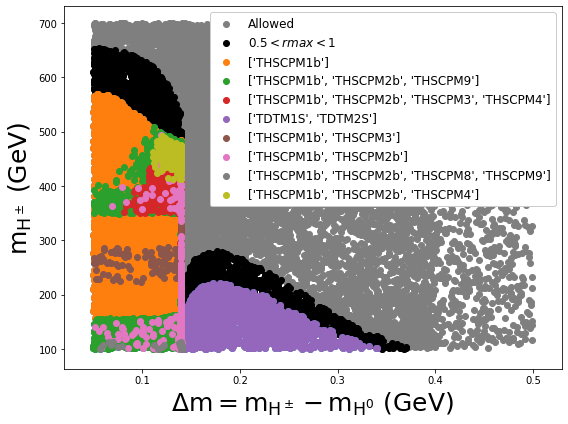

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(ald['deltaM'], ald['mHc'], color='tab:grey', label="Allowed")
plt.scatter(near['deltaM'], near['mHc'], color='black', label=r"$0.5<rmax<1$")
plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['topo']==topo]
    label = topo
    plt.scatter(toplot['deltaM'], toplot['mHc'], label=label)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.xlabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 25)
plt.ylabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()